In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import svm
import matplotlib.pyplot as plt

In [1]:
# Store the data and get the class counts
df_train = pd.read_csv('training_set_large.csv')
df_test = pd.read_csv('test_set_large.csv')
classes = df_train['subreddit'].unique()

# fill empty value with spaces
df_train = df_train.fillna(' ')
df_test = df_test.fillna(' ')

NameError: name 'pd' is not defined

In [6]:
# Logistic Regression to determine word cutoff
f1_trainlist = []
f1_testlist = []

# Iterate through different value of M to calculate M that provides highest F1 Score for test set 
for M in range(20, 160, 10):

    # Perform CountVectorizer on text
    count_vect = CountVectorizer(binary=True, min_df=M)
    X_train = count_vect.fit_transform(df_train['selftext'])
    X_dev = count_vect.transform(df_test['selftext'])

    # create logistic model with no regularization terms
    logreg = LogisticRegression(multi_class='ovr', penalty='none', max_iter = 10000)
    logreg.fit(X_train, df_train['subreddit'].values)

    # calculate F1 score
    f1_train = f1_score(df_train['subreddit'].values, logreg.predict(X_train), average = 'micro')
    f1_test = f1_score(df_test['subreddit'].values, logreg.predict(X_dev), average = 'micro')

    # append F1 score to lists for plotting
    f1_trainlist.append(f1_train)
    f1_testlist.append(f1_test)

KeyboardInterrupt: 

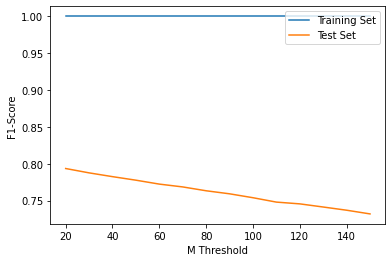

In [ ]:
# plot F1-Score for Dev and Training sets to determine optimal M
plt.plot(range(20, 160, 10), f1_trainlist, label="Training Set")
plt.plot(range(20, 160, 10), f1_testlist, label="Test Set")
plt.xlabel("M Threshold")
plt.ylabel("F1-Score")
leg = plt.legend(loc='upper right')
plt.show()

In [3]:
# Choose M = 100 for performance on hardware and little degradation in performance
M = 100

# Perform CountVectorizer on text with new M threshold
count_vect = CountVectorizer(binary=True, min_df=M)
X_train = count_vect.fit_transform(df_train['selftext'])
X_test = count_vect.transform(df_test['selftext'])

# print number of feature vectors
print(len(count_vect.vocabulary_.keys()))

7729


In [10]:
# Baseline Logistic Regression with no Regularization Terms
logreg = LogisticRegression(multi_class='ovr', penalty='none', max_iter = 10000)
logreg.fit(X_train, df_train['subreddit'].values)

# calculate F1 score
f1_train = f1_score(df_train['subreddit'].values, logreg.predict(X_train), average = 'micro')
f1_test = f1_score(df_test['subreddit'].values, logreg.predict(X_test), average = 'micro')

# print F1 values out
print(f"Training set with no regularization terms F1-Score is {f1_train}")
print(f"Test set with no regularization terms F1-Score is {f1_test}")

Training set with no regularization terms F1-Score is 0.99994
Test set with no regularization terms F1-Score is 0.75386


In [11]:
# Logistic Regression with L1 regularization (try regularization strengths of 0.5, 1, 1.5, 2, 2.5, 3, 4, 5)

# Determine regularization strength with L1 regularization
f1_logL1_trainlist = []
f1_logL1_testlist = []
reg_strength = [0.05, 0.1, 0.25, 0.5, 1, 1.5, 2, 3, 5]

for L in reg_strength:
    
    logregL1 = LogisticRegression(penalty='l1', solver='liblinear', C = L, max_iter = 10000)
    logregL1.fit(X_train, df_train['subreddit'].values)

    # calculate F1 score
    f1_train_L1 = f1_score(df_train['subreddit'].values, logregL1.predict(X_train), average = 'micro')
    f1_test_L1 = f1_score(df_test['subreddit'].values, logregL1.predict(X_test), average = 'micro')

    # append F1 score to lists for plotting
    f1_logL1_trainlist.append(f1_train_L1)
    f1_logL1_testlist.append(f1_test_L1)


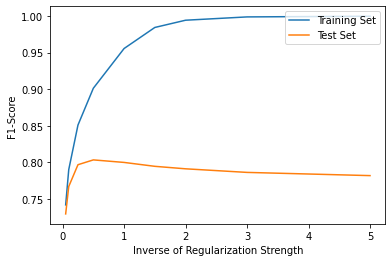

In [17]:
# plot F1-Score for Dev and Training for L1 regularization for Logistic Regression
plt.plot(reg_strength, f1_logL1_trainlist, label="Training Set")
plt.plot(reg_strength, f1_logL1_testlist, label="Test Set")
plt.xlabel("Inverse of Regularization Strength")
plt.ylabel("F1-Score")
leg = plt.legend(loc='upper right')
plt.show()

In [13]:
# Determine regularization strength with L2 regularization
f1_logL2_trainlist = []
f1_logL2_testlist = []
reg_strength = [0.05, 0.1, 0.25, 0.5, 1, 1.5, 2, 3, 5]

for L in reg_strength:
    
    logregL2 = LogisticRegression(penalty='l2', solver='liblinear', C = L, max_iter = 10000)
    logregL2.fit(X_train, df_train['subreddit'].values)

    # calculate F1 score
    f1_train_L2 = f1_score(df_train['subreddit'].values, logregL2.predict(X_train), average = 'micro')
    f1_test_L2 = f1_score(df_test['subreddit'].values, logregL2.predict(X_test), average = 'micro')

    # append F1 score to lists for plotting
    f1_logL2_trainlist.append(f1_train_L2)
    f1_logL2_testlist.append(f1_test_L2)

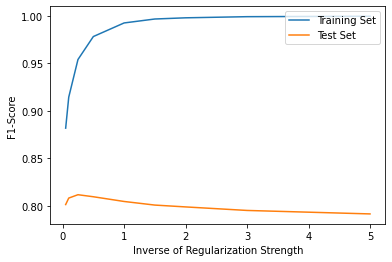

In [24]:
# plot F1-Score for Dev and Training for L2 regularization for Logistic Regression
plt.plot(reg_strength, f1_logL2_trainlist, label="Training Set")
plt.plot(reg_strength, f1_logL2_testlist, label="Test Set")
plt.xlabel("Inverse of Regularization Strength")
plt.ylabel("F1-Score")
leg = plt.legend(loc='upper right')
plt.show()

In [5]:
# Support Vector Machine Method 

# Baseline Support Vector Machine Method
svm_model = svm.LinearSVC(max_iter = 10000)
svm_model.fit(X_train, df_train['subreddit'].values)

# calculate F1 score
f1_train_svm = f1_score(df_train['subreddit'].values, svm_model.predict(X_train), average = 'micro')
f1_test_svm = f1_score(df_test['subreddit'].values, svm_model.predict(X_test), average = 'micro')

# print F1 values out
print(f"Training set with no regularization terms F1-Score is {f1_train_svm}")
print(f"Test set with no regularization terms F1-Score is {f1_test_svm}")

Training set with no regularization terms F1-Score is 0.999915
Test set with no regularization terms F1-Score is 0.76402


In [13]:
# Determine regularization strength for L1 Penalty
f1_logL1_svm_trainlist = []
f1_logL1_svm_testlist = []
reg_strength = [0.005, 0.01, 0.05, 0.1, 0.25, 0.5]

for L in reg_strength:
    
    svm_model_l1 = svm.LinearSVC(max_iter = 2500, penalty = "l1", loss = "squared_hinge", dual = False, C = L)
    svm_model_l1.fit(X_train, df_train['subreddit'].values)

    # calculate F1 score
    f1_train_L1_svm = f1_score(df_train['subreddit'].values, svm_model_l1.predict(X_train), average = 'micro')
    f1_test_L1_svm = f1_score(df_test['subreddit'].values, svm_model_l1.predict(X_test), average = 'micro')

    # append F1 score to lists for plotting
    f1_logL1_svm_trainlist.append(f1_train_L1_svm)
    f1_logL1_svm_testlist.append(f1_test_L1_svm)

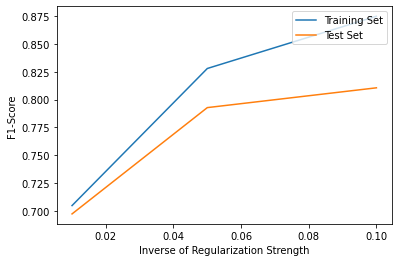

In [5]:
# plot F1-Score for Dev and Training for L1 regularization
plt.plot(reg_strength, f1_logL1_svm_trainlist, label="Training Set")
plt.plot(reg_strength, f1_logL1_svm_testlist, label="Test Set")
plt.xlabel("Inverse of Regularization Strength")
plt.ylabel("F1-Score")
leg = plt.legend(loc='upper right')
plt.show()

In [11]:
# Determine regularization strength for L2 Penalty
f1_logL2_svm_trainlist = []
f1_logL2_svm_testlist = []
reg_strength = [0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 1, 1.5, 2, 3, 5]

for L in reg_strength:
    
    svm_model_l2 = svm.LinearSVC(max_iter = 50000, penalty = "l2", C = L)
    svm_model_l2.fit(X_train, df_train['subreddit'].values)

    # calculate F1 score
    f1_train_L2_svm = f1_score(df_train['subreddit'].values, svm_model_l2.predict(X_train), average = 'micro')
    f1_test_L2_svm = f1_score(df_test['subreddit'].values, svm_model_l2.predict(X_test), average = 'micro')

    # append F1 score to lists for plotting
    f1_logL2_svm_trainlist.append(f1_train_L2_svm)
    f1_logL2_svm_testlist.append(f1_test_L2_svm)

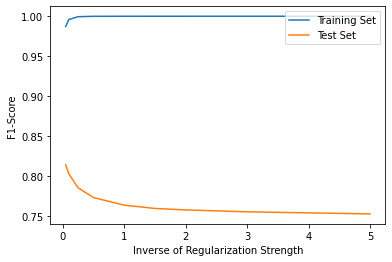

In [5]:
# plot F1-Score for Dev and Training for L2 regularization
plt.plot(reg_strength, f1_logL2_svm_trainlist, label="Training Set")
plt.plot(reg_strength, f1_logL2_svm_testlist, label="Test Set")
plt.xlabel("Inverse of Regularization Strength")
plt.ylabel("F1-Score")
leg = plt.legend(loc='upper right')
plt.show()